In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [6]:
data.shape

(11251, 15)

In [8]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
data.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
data.drop(['Status','unnamed1'], axis=1, inplace= True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [20]:
data.shape

(11251, 13)

In [22]:
data.dropna(inplace= True)

In [24]:
data['Amount'] = data['Amount'].astype('int')

In [26]:
data['Amount'].dtypes

dtype('int32')

# Data Analysis

## Gender

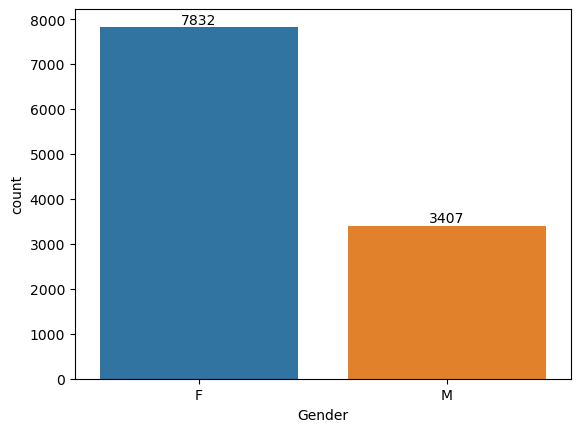

In [50]:
ax = sns.countplot(x='Gender',hue='Gender', data=data)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

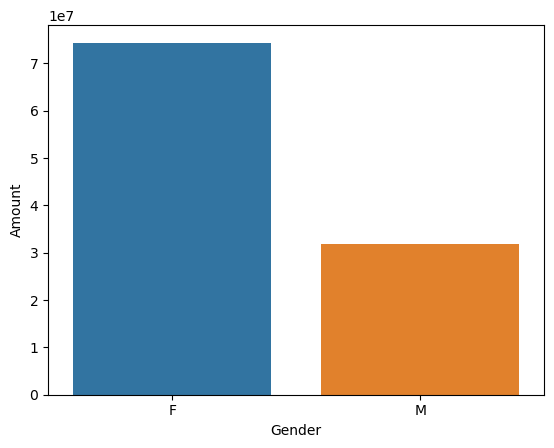

In [52]:
sales_gen= data.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by=['Amount'],ascending= False)
sns.barplot(x='Gender', y='Amount',hue='Gender',data=sales_gen)

*From above graph we can see that most of the buyers are females and have more purchasing power in comparison to men.*

## Age

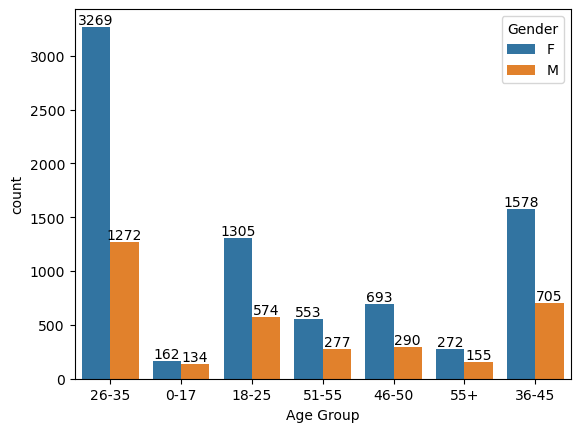

In [44]:
rx=sns.countplot(x='Age Group', hue='Gender', data=data)
for bars in rx.containers:
    rx.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

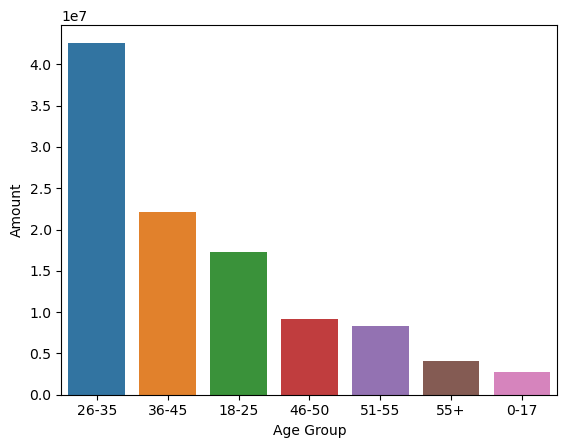

In [56]:
sales_age= data.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by=['Amount'],ascending= False)
sns.barplot(x='Age Group', y='Amount',hue='Age Group', data=sales_age)

*From above graph we can see the age group 26-35yrs females have spent the most money.*

## State

<Axes: xlabel='State', ylabel='Orders'>

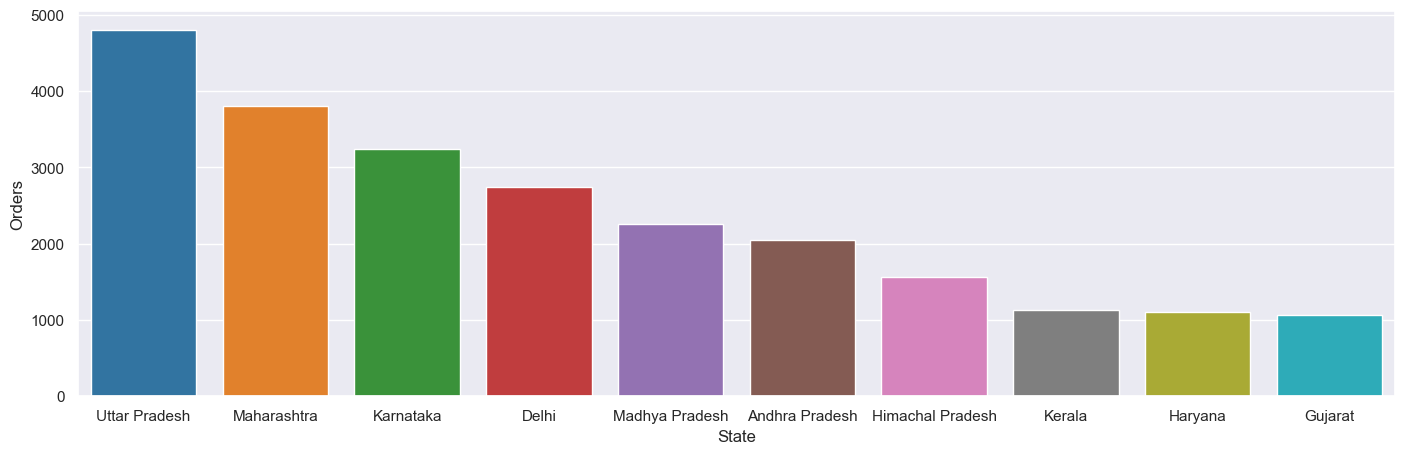

In [95]:
sales_state= data.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders',hue='State',palette='tab10',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

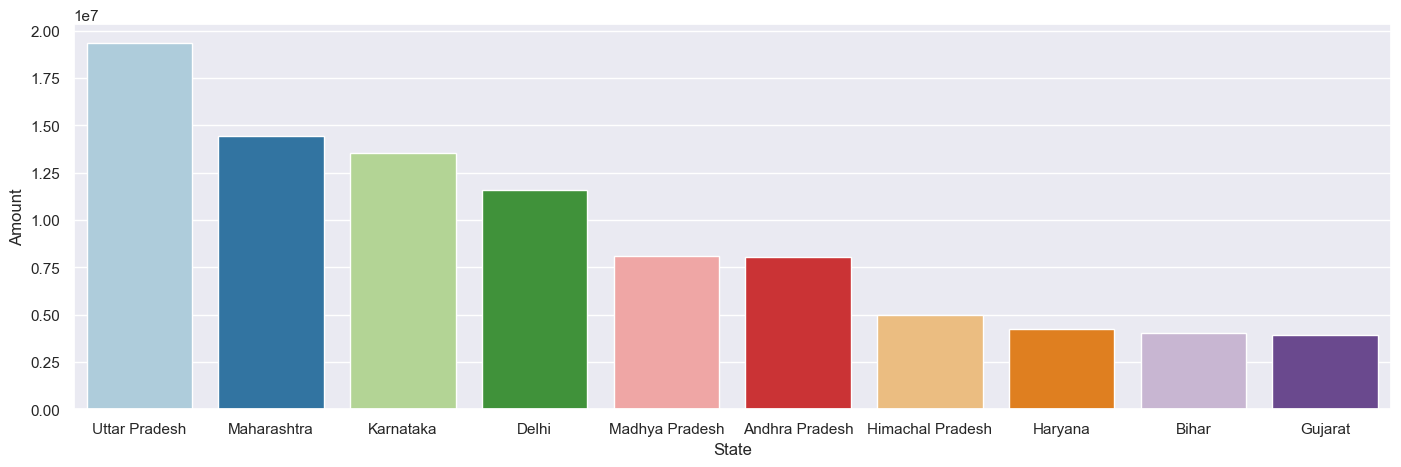

In [87]:
sales_amt=data.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Amount',hue='State',palette='Paired',data=sales_amt)

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*

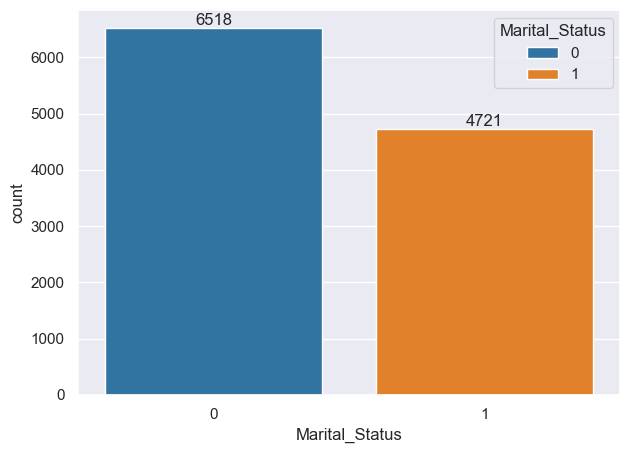

In [105]:
px = sns.countplot(x='Marital_Status',hue='Marital_Status',palette='tab10', data=data)

sns.set(rc={'figure.figsize':(9,5)})
for bars in px.containers:
    px.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

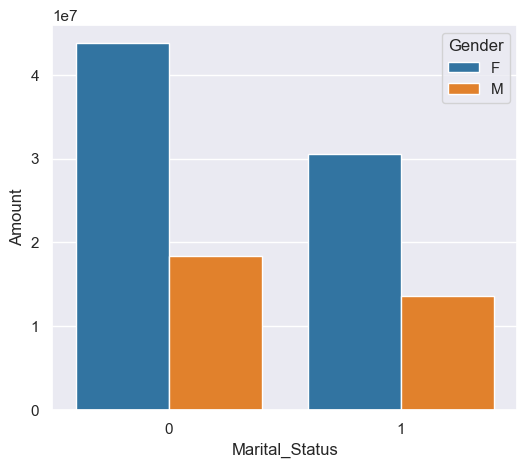

In [109]:
sales_status= data.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status', y='Amount',hue='Gender',palette='tab10', data=sales_status)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.*

## Occupation

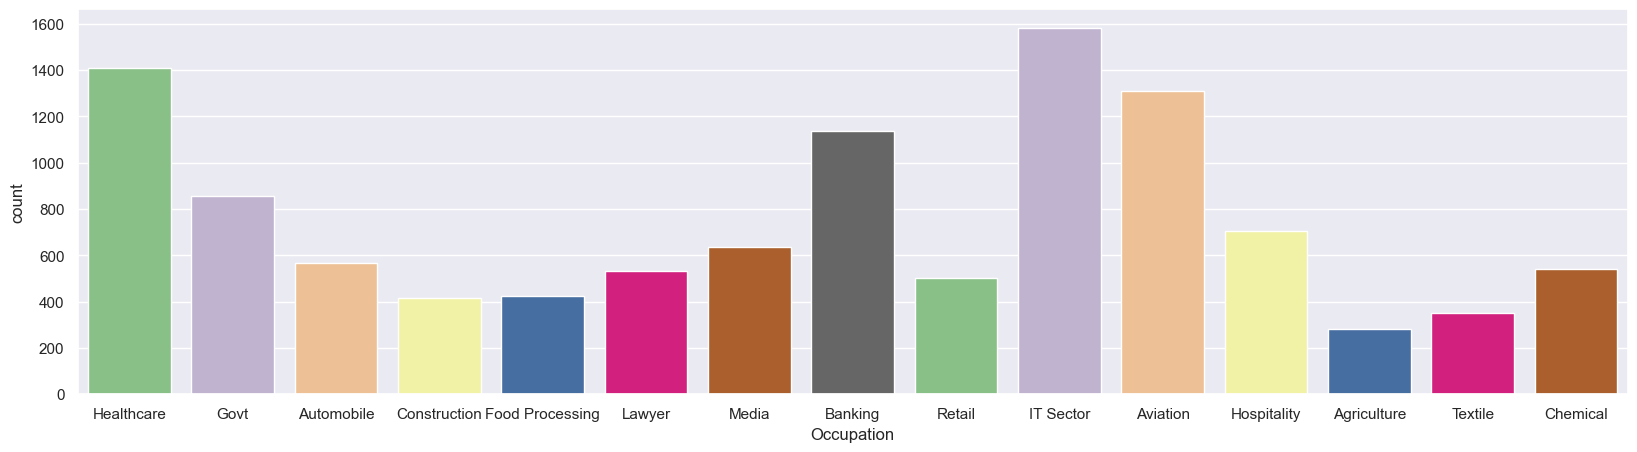

In [124]:
sns.set(rc={'figure.figsize':(20,5)})
ux = sns.countplot(x='Occupation', hue='Occupation', palette='Accent',data=data)

for bar in ux.containers:
    ux.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

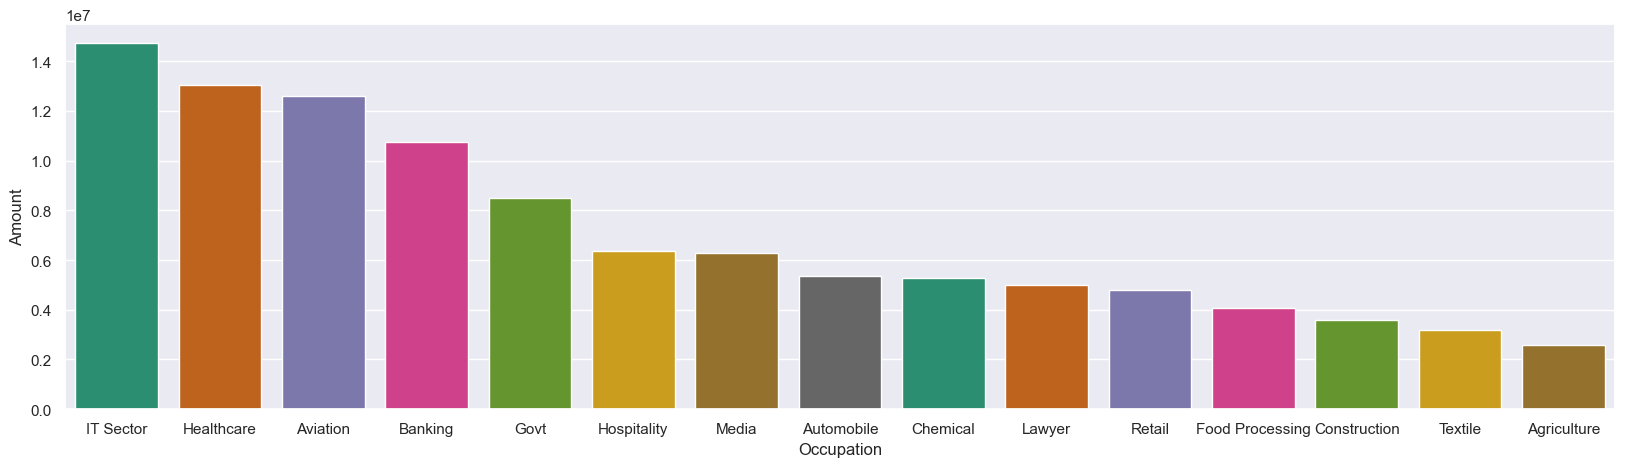

In [10]:
sales_occ= data.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y='Amount', hue='Occupation',palette='Dark2', data=sales_occ)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.*

## Product Category

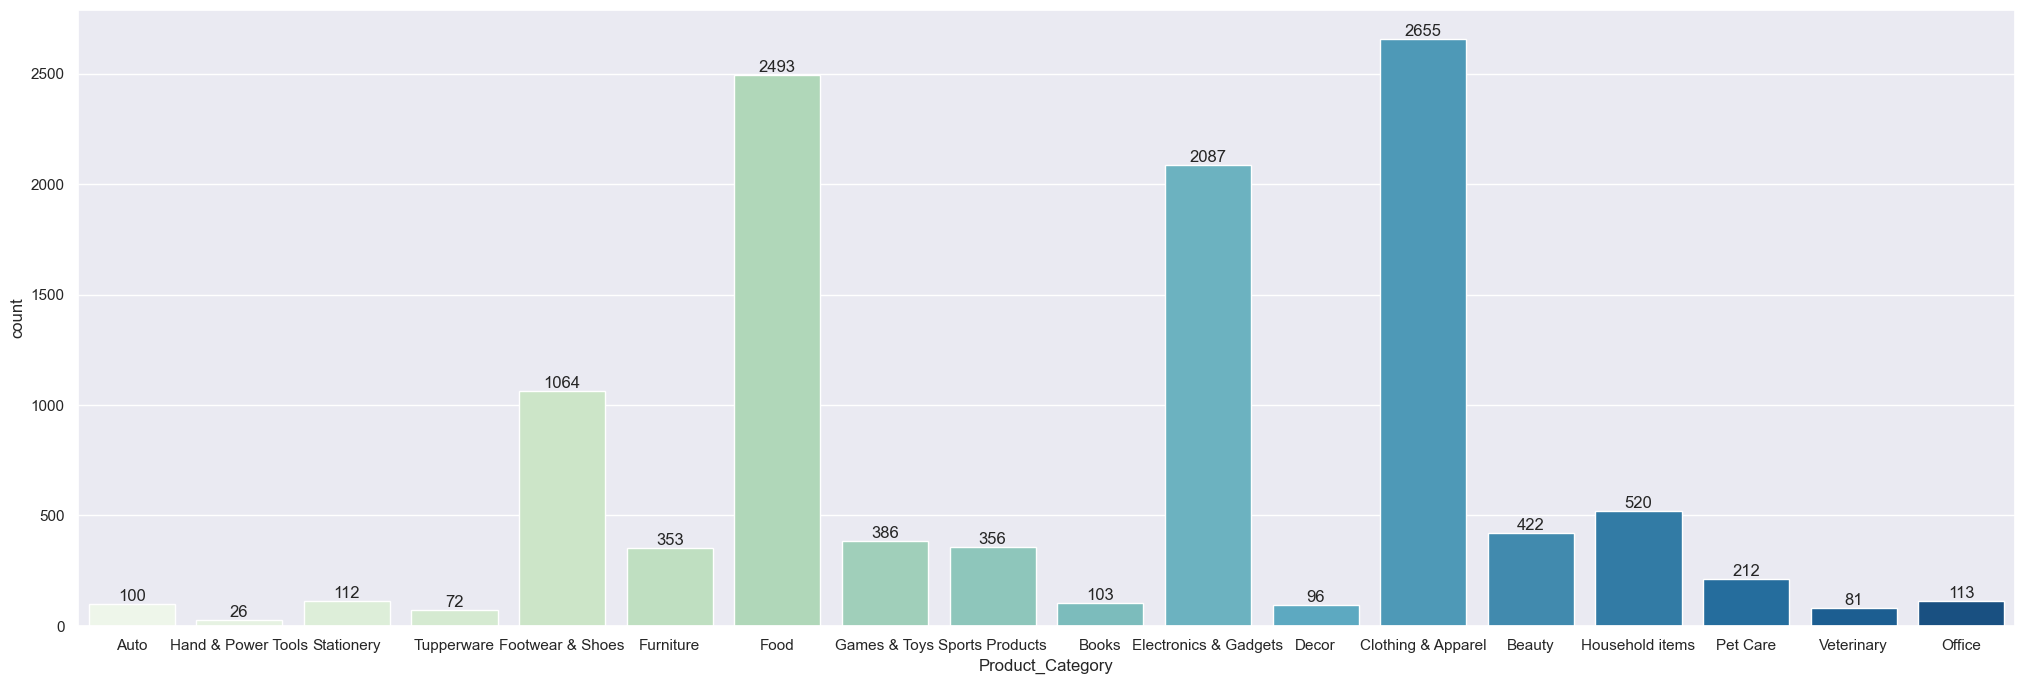

In [23]:
sns.set(rc={'figure.figsize':(25,8)})
ex = sns.countplot(x='Product_Category', hue='Product_Category',palette='GnBu', data=data)

for bars in ex.containers:
    ex.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

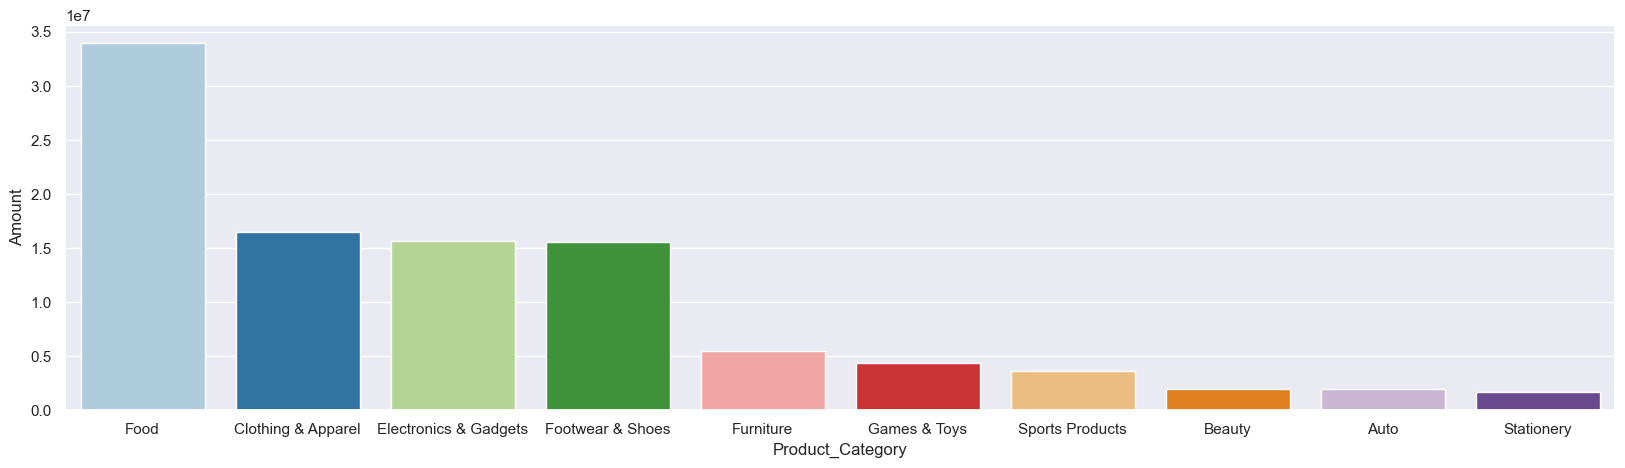

In [41]:
sales_prod = data.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', hue='Product_Category', palette='Paired', data=sales_prod)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

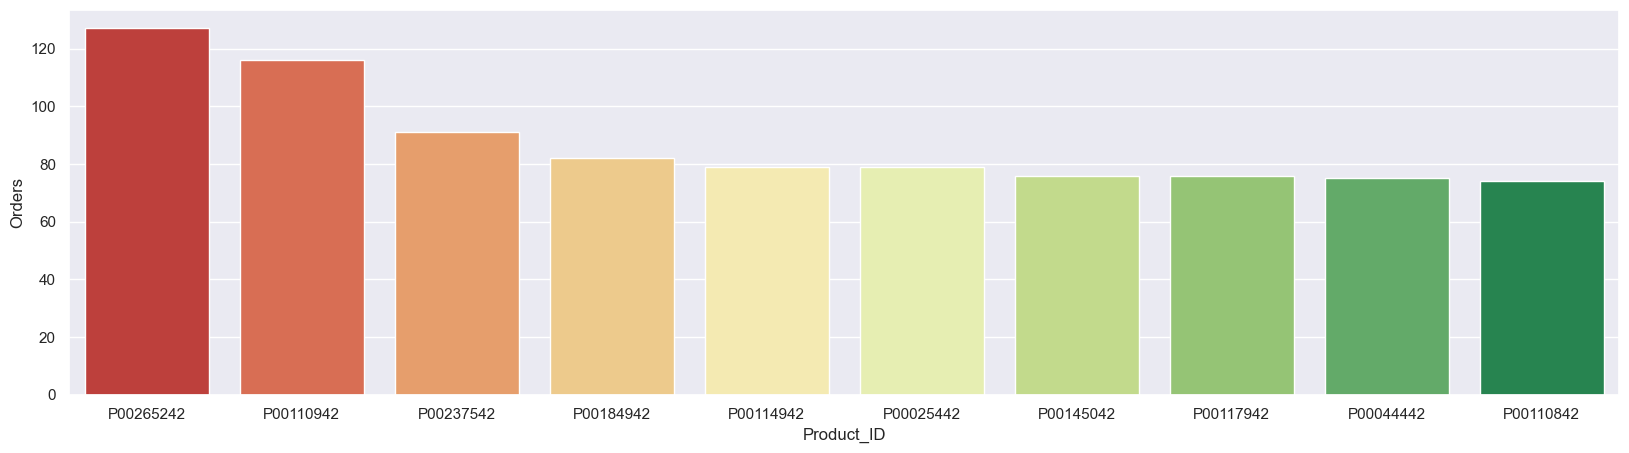

In [43]:
sales_ID = data.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID', y='Orders', hue='Product_ID', palette='RdYlGn', data=sales_ID)

## Conclusion


*Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*